# Import data

In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient

In [2]:
client = MongoClient('localhost', 27017)
db = client.Belair
collection = db.data
# Extract data, sort by timestamp and reset indexes
base_df = pd.DataFrame(list(collection.find())).reset_index(drop=True)
print(len(base_df))
base_df.head()

193008


,_id,device,gateways,gpsLat,gpsLon,hdop,rx_time,seqNumber,spfact
0,5c17af0d4fa20f164de4b0bb,3432333852378918,"[{'rssi': -93, 'esp': -93.461838, 'snr': 10, '...",51.194618,4.418419,0.66,2018-12-17 14:13:33.410,54916,7
1,5c17af2d4fa20f164de4b0c7,3432333852378918,"[{'rssi': -104, 'esp': -104.331955, 'snr': 11,...",51.194618,4.418417,0.69,2018-12-17 14:14:04.616,54917,7
2,5c17af3c4fa20f164de4b0cb,3432333855378A18,"[{'rssi': -107, 'esp': -111.124428, 'snr': -2,...",51.215408,4.413910,0.67,2018-12-17 14:14:19.768,15653,7
3,5c17af4d4fa20f164de4b0d4,3432333852378918,"[{'rssi': -107, 'esp': -107.973228, 'snr': 6, ...",51.194614,4.418419,0.74,2018-12-17 14:14:36.499,54918,7
4,5c17af604fa20f164de4b0df,3432333851378918,"[{'rssi': -114, 'esp': -119.455406, 'snr': -4,...",51.241817,4.430120,0.66,2018-12-17 14:14:56.056,48522,7


In [3]:
df = base_df.drop(columns=['_id', 'gateways', 'hdop'])
df.head()

,device,gpsLat,gpsLon,rx_time,seqNumber,spfact
0,3432333852378918,51.194618,4.418419,2018-12-17 14:13:33.410,54916,7
1,3432333852378918,51.194618,4.418417,2018-12-17 14:14:04.616,54917,7
2,3432333855378A18,51.215408,4.413910,2018-12-17 14:14:19.768,15653,7
3,3432333852378918,51.194614,4.418419,2018-12-17 14:14:36.499,54918,7
4,3432333851378918,51.241817,4.430120,2018-12-17 14:14:56.056,48522,7


In [4]:
device_ids = base_df['device'].unique()
device_ids

array(['3432333852378918', '3432333855378A18', '3432333851378918',
       '3432333864377C18', '3432333855376418', '3432333853376B18',
       '343233386B376717', '3432333851376518', '3432333855376318',
       '3432333860376818', '343233384D378718', '343233384F378B18',
       '343233386A377C18', '3432333864378618', '3432333857376218',
       '343233385F377C18'], dtype=object)

# Check timestamps
If most of the timestamps are matching, we can assume that the other timestamps can easily be integrated

In [5]:
for thingID in device_ids:
    # Check number of occurrences of this device in the basic database
    df_1 = df[df['device']== thingID]
    occ = len(df_1)
    path = r'C:\Users\JeffG\Desktop\Case 2 - data\data/lora.' + thingID
    df_2 = pd.read_csv(path+'\\lora.'+str(thingID) +'_' + 'airquality.no2' +'_Belair'+'.csv').drop(columns=['Unnamed: 0'])
    df_2['time'] = pd.to_datetime(df_2['time'], unit='ms')
    df_3 = df_1.merge(df_2, left_on='rx_time', right_on='time', how='inner')
    matches = len(df_3)
    print(thingID + " | occurrences: " + str(occ) + 
          " - matches: " + str(matches) + 
          " - diff: " + str(occ - matches) + "(" + str((occ-matches)/matches*100) + "%)")

3432333852378918 | occurrences: 12280 - matches: 12275 - diff: 5(0.04073319755600815%)
3432333855378A18 | occurrences: 10159 - matches: 10159 - diff: 0(0.0%)
3432333851378918 | occurrences: 33145 - matches: 32250 - diff: 895(2.7751937984496124%)
3432333864377C18 | occurrences: 38978 - matches: 37695 - diff: 1283(3.4036344342751024%)
3432333855376418 | occurrences: 9784 - matches: 9325 - diff: 459(4.92225201072386%)
3432333853376B18 | occurrences: 11663 - matches: 10748 - diff: 915(8.513211760327504%)
343233386B376717 | occurrences: 7062 - matches: 6574 - diff: 488(7.423182233039245%)
3432333851376518 | occurrences: 2211 - matches: 1691 - diff: 520(30.75103489059728%)
3432333855376318 | occurrences: 9198 - matches: 8734 - diff: 464(5.312571559422945%)
3432333860376818 | occurrences: 20387 - matches: 19397 - diff: 990(5.103882043614992%)
343233384D378718 | occurrences: 801 - matches: 801 - diff: 0(0.0%)
343233384F378B18 | occurrences: 2277 - matches: 2277 - diff: 0(0.0%)
343233386A377C18

# Plot start data for one sensor

In [38]:
thingID = '3432333852378918'
path = r'C:\Users\JeffG\Desktop\Case 2 - data\data/lora.' + thingID
# df1 is the part of the MongoDB with the same device ID
df1 = df[df['device']== thingID]
# df2 is all the data we have in the metrics database of this device
df2 = pd.read_csv(path+'\\lora.'+str(thingID) +'_' + 'airquality.no2' +'_Belair'+'.csv').drop(columns=['Unnamed: 0'])
df2['time'] = pd.to_datetime(df2['time'], unit='ms')
# We merge both dataframes to find the intersection of the two
common = df1.merge(df2, left_on='rx_time', right_on='time', how='inner')

In [36]:
def calculate_diff(df):
    # Sort
    temp = df.sort_values(['rx_time'],ascending=[True]).reset_index()
    
    # Calculate time differences based on the device IDs 
    diff = temp.groupby('device')['rx_time'].diff()
    
    # Add the new columns to the previous data frame
    temp = temp.assign(diff=pd.Series(diff.values))
    temp['diff'] = temp['diff'].astype('timedelta64[s]')
    
    # Drop the rows with NaT-value
    temp = temp.dropna(subset=['diff'])
    
    return temp

In [40]:
df1_ = calculate_diff(df1).drop(columns=['index'])
df1_.head()

,device,gpsLat,gpsLon,rx_time,seqNumber,spfact,diff
1,3432333852378918,51.194618,4.418417,2018-12-17 14:14:04.616,54917,7,31.0
2,3432333852378918,51.194614,4.418419,2018-12-17 14:14:36.499,54918,7,31.0
3,3432333852378918,51.194611,4.418422,2018-12-17 14:15:07.931,54919,7,31.0
4,3432333852378918,51.194614,4.418433,2018-12-17 14:15:39.689,54920,7,31.0
5,3432333852378918,51.194618,4.418441,2018-12-17 14:16:11.129,54921,7,31.0


In [42]:
import matplotlib.pyplot as plt

C:\Users\JeffG\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


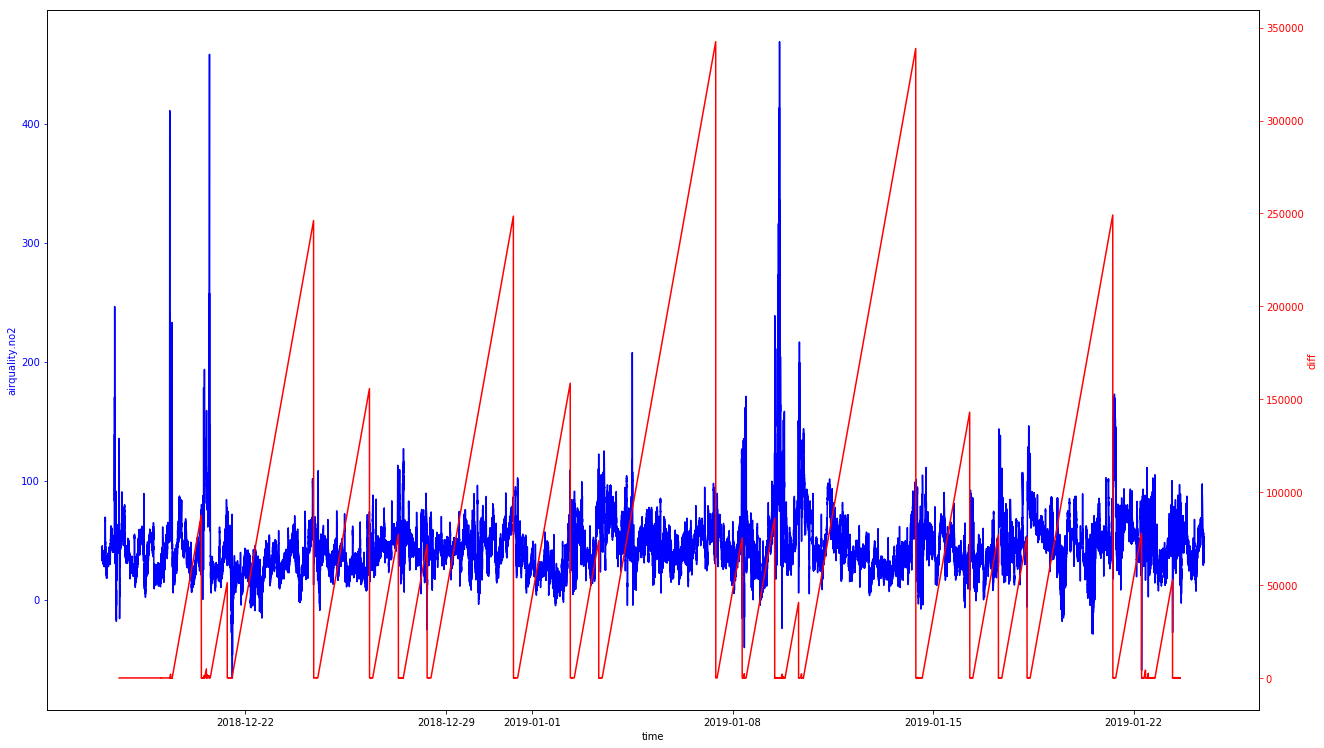

<Figure size 1080x720 with 0 Axes>

In [43]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(15,10))

x1=df2['time']
y1= df2['value']
ax1.plot(x1, y1, 'b-')
ax1.set_xlabel('time')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('airquality.no2', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
x2=df1_['rx_time']
y2=df1_['diff']
ax2.plot(x2, y2, 'r-')
ax2.set_ylabel('diff', color='r')
ax2.tick_params('y', colors='r')

fig.set_size_inches(18.5, 10.5)

fig.tight_layout()
#fig.savefig(r'C:\Users\JeffG\Dropbox\ICT-Elektronica\Thesis\Case 1 - failing battery pack\Images\msup1g30034_voltage_light.png')
plt.show()

In [120]:
from bokeh.plotting import figure, output_file, show, output_notebook

output_notebook()

p = figure(plot_width=800, plot_height=400)

x=df1_['rx_time']
y=df1_['diff']

# add a line renderer
p.line(x, y, line_width=2)

show(p)

Loading BokehJS ...

# Fit missing data
Those datapoints that occur in the metrics data but not in the metadata need to be integrated in the dataframe

In [7]:
df2.head()

,time,value
0,2018-12-17 00:00:10.233,34.027782
1,2018-12-17 00:00:41.570,32.625480
2,2018-12-17 00:01:13.463,38.322342
3,2018-12-17 00:02:48.015,36.437996
4,2018-12-17 00:03:20.900,40.666817


In [8]:
common.head()

,device,gpsLat,gpsLon,rx_time,seqNumber,spfact,time,value
0,3432333852378918,51.194618,4.418419,2018-12-17 14:13:33.410,54916,7,2018-12-17 14:13:33.410,132.561550
1,3432333852378918,51.194618,4.418417,2018-12-17 14:14:04.616,54917,7,2018-12-17 14:14:04.616,131.816570
2,3432333852378918,51.194614,4.418419,2018-12-17 14:14:36.499,54918,7,2018-12-17 14:14:36.499,132.123340
3,3432333852378918,51.194614,4.418433,2018-12-17 14:15:39.689,54920,7,2018-12-17 14:15:39.689,126.908516
4,3432333852378918,51.194618,4.418441,2018-12-17 14:16:11.129,54921,7,2018-12-17 14:16:11.129,124.235374


In [12]:
not_common_1 = df1[(~df1.rx_time.isin(common.rx_time))]
not_common_2 = df2[(~df2.time.isin(common.rx_time))]

In [13]:
print("Common: " + str(len(common)))
print("Not common 1: " + str(len(not_common_1)))
print("Not common 2: " + str(len(not_common_2)))

Common: 12275
Not common 1: 5
Not common 2: 80753


In [11]:
not_common.head()

,time,value
0,2018-12-17 00:00:10.233,34.027782
1,2018-12-17 00:00:41.570,32.625480
2,2018-12-17 00:01:13.463,38.322342
3,2018-12-17 00:02:48.015,36.437996
4,2018-12-17 00:03:20.900,40.666817


In [18]:
not_common = not_common.rename(index = str, columns={"time": "rx_time"}).drop(columns=['value'])

In [20]:
not_common['device'] = thingID

In [21]:
not_common.head()

,rx_time,device
0,2018-12-17 00:00:10.233,3432333852378918
1,2018-12-17 00:00:41.570,3432333852378918
2,2018-12-17 00:01:13.463,3432333852378918
3,2018-12-17 00:02:48.015,3432333852378918
4,2018-12-17 00:03:20.900,3432333852378918


In [77]:
df3 = df1.append(not_common, sort=False).sort_values('rx_time')

In [79]:
df3.to_csv(r'C:\Users\JeffG\Desktop\Case 2 - data\testing\test.csv')

In [78]:
df3 = df3.reset_index().drop(columns=['index'])

# Find out what the reason is for the missing data
Do the gaps always occur at the same location?
Let's filter out the points before and after a gap

## Filter out the points before and after a gap

In [66]:
from math import isnan

In [114]:
result = pd.DataFrame(columns = list(df.columns) + ['order'])
prv = df3.iloc[0]['spfact']
crr = df3.iloc[1]['spfact']
for i in range(1,len(df3)-1):
    nxt = df3.iloc[i+1]['spfact']
    if((isnan(prv)==True) & (isnan(crr)==False)):
        row = df3.iloc[i]
        row['order'] = 'before'
        result = result.append(row)
    elif ((isnan(crr)==False) & (isnan(nxt)==True)):
        row = df3.iloc[i]
        row['order'] = 'after'
        result = result.append(row)     
    prv = crr
    crr = nxt

In [122]:
print(len(result))
result.head()

100


,device,gpsLat,gpsLon,rx_time,seqNumber,spfact,order
1537,3432333852378918,51.194618,4.418419,2018-12-17 14:13:33.410,54916.0,7.0,before
3630,3432333852378918,51.194172,4.418662,2018-12-18 08:41:44.792,57021.0,7.0,after
3632,3432333852378918,51.194172,4.418666,2018-12-18 08:42:47.996,57023.0,7.0,before
4190,3432333852378918,51.194176,4.418632,2018-12-18 13:38:48.180,57585.0,7.0,after
4192,3432333852378918,51.194176,4.418632,2018-12-18 13:39:51.487,57587.0,7.0,before


## Plot the results

# Fill up gaps in data